In [6]:
# Upload dataset
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (2).csv


In [17]:
#Take Any dataset of your choice and do the visualization
#DATASET LINK-https://www.kaggle.com/datasets/shivamb/netflix-shows
#(SUBMITTED BY-RONAK KUMAR StudentId: CT_CSI_DS_1980)

In [7]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [8]:
# Load dataset
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


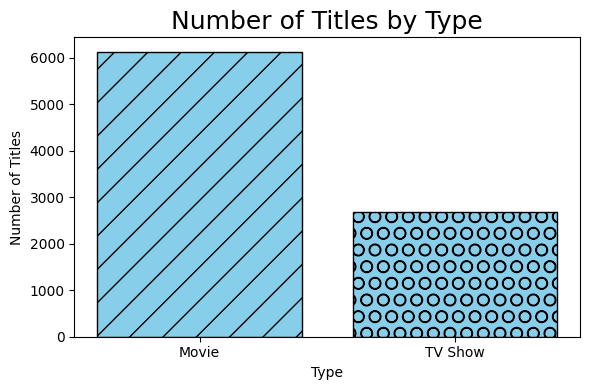

In [9]:
# Data
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(6,4), dpi=100)
bars = plt.bar(type_counts.index, type_counts.values, color='skyblue', edgecolor='black')

# Hatch patterns
patterns = ['/', 'O']
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# Title and labels
plt.title('Number of Titles by Type', fontdict={'fontsize': 18})
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


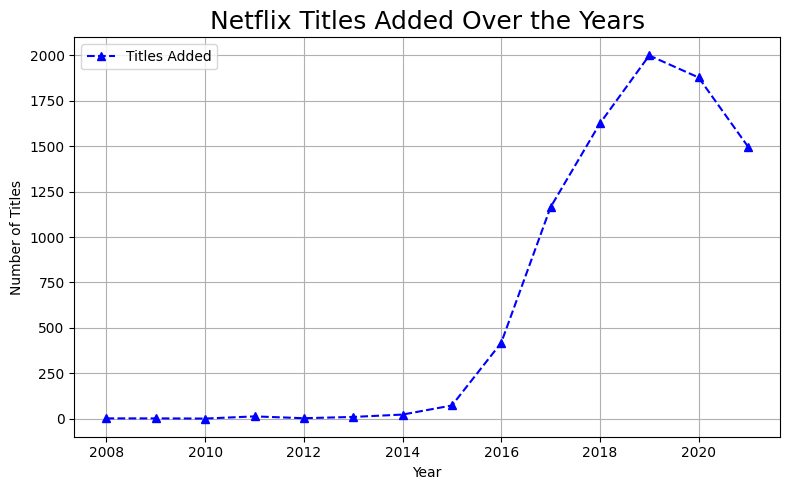

In [12]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows with missing date
df_clean = df.dropna(subset=['date_added']).copy()

# Extract year safely
df_clean['year_added'] = df_clean['date_added'].dt.year.astype(int)

# Count titles per year
yearly_counts = df_clean['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5), dpi=100)
plt.plot(yearly_counts.index, yearly_counts.values, 'b^--', label='Titles Added')

plt.title('Netflix Titles Added Over the Years', fontdict={'fontsize': 18})
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


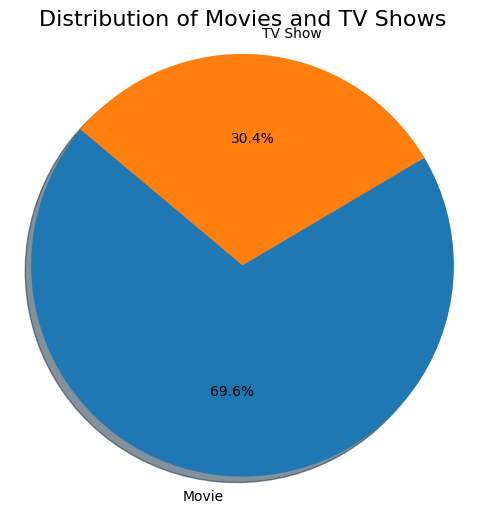

In [13]:
plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Movies and TV Shows', fontsize=16)
plt.axis('equal')  # Makes the pie a circle
plt.show()


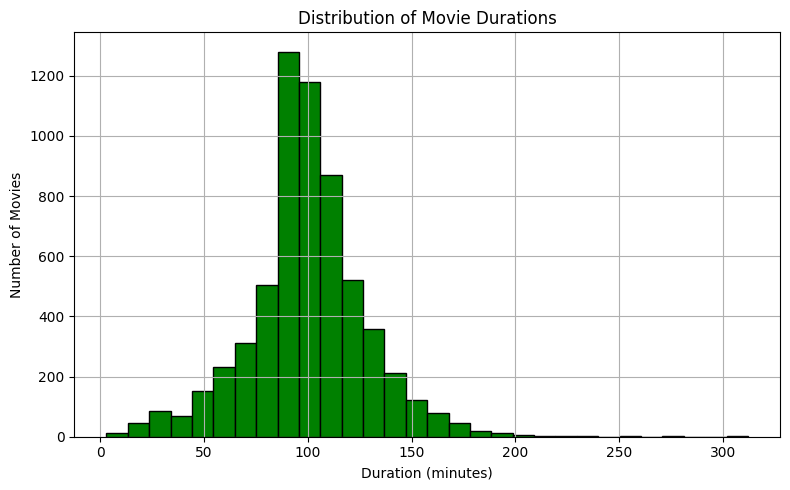

In [15]:
# Filter only Movies and create a safe copy
movie_df = df[df['type'] == 'Movie'].copy()


movie_df['duration_minutes'] = movie_df['duration'].str.extract('(\d+)').astype(float)

# Plot
plt.figure(figsize=(8, 5))
plt.hist(movie_df['duration_minutes'].dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


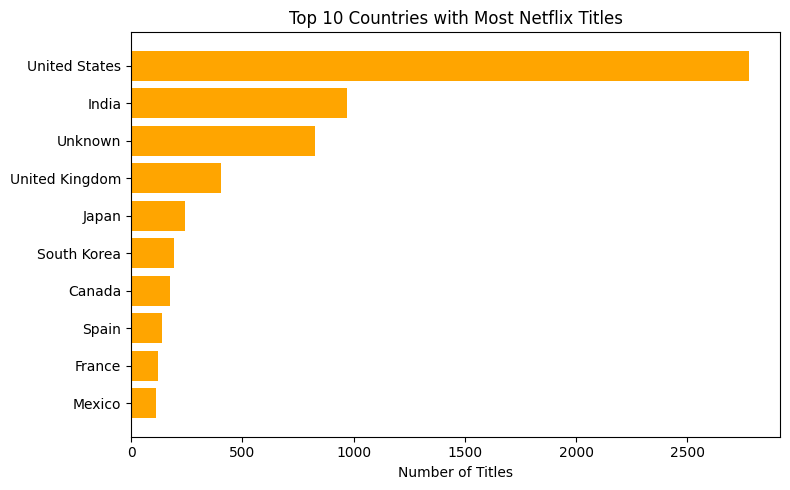

In [16]:
# Clean country column
df['country'] = df['country'].fillna('Unknown')
country_counts = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(8,5))
plt.barh(country_counts.index[::-1], country_counts.values[::-1], color='orange')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()
